### Loss 和 Accuracy 曲线绘制函数（加载 Tensorboard 数据）

In [6]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

def plot_tensorboard_logs(log_dirs):
    # 初始化数据存储
    all_test_acc = []
    all_train_loss = []
    all_test_loss = []
    labels = []

    for log_dir in log_dirs:
        # 读取日志文件
        ea = event_accumulator.EventAccumulator(log_dir)
        ea.Reload()

        # 获取验证的Accuracy
        test_acc = ea.Scalars('Accuracy/test')

        # 获取训练和验证的Loss
        train_loss = ea.Scalars('Loss/train')
        test_loss = ea.Scalars('Loss/test')

        # 提取数据
        test_acc_values = [x.value for x in test_acc]
        train_loss_values = [x.value for x in train_loss]
        test_loss_values = [x.value for x in test_loss]

        all_test_acc.append(test_acc_values)
        all_train_loss.append(train_loss_values)
        all_test_loss.append(test_loss_values)
        labels.append(log_dir)

    epochs = range(len(all_test_acc[0]))

    # 绘制Accuracy图像
    plt.figure(figsize=(8, 12))
    plt.subplot(2, 1, 1)
    for i, test_acc_values in enumerate(all_test_acc):
        plt.plot(epochs, test_acc_values, label=f'Test Accuracy {labels[i]}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy Comparison')
    plt.legend()

    # 绘制Loss图像
    plt.subplot(2, 1, 2)
    for i, (train_loss_values, test_loss_values) in enumerate(zip(all_train_loss, all_test_loss)):
        plt.plot(epochs, train_loss_values, label=f'Train Loss {labels[i]}')
        plt.plot(epochs, test_loss_values, label=f'Test Loss {labels[i]}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Comparison')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [2]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

def plot_Loss(log_dirs):
    # 初始化数据存储
    all_train_loss = []
    all_test_loss = []
    labels = []

    for log_dir in log_dirs:
        # 读取日志文件
        ea = event_accumulator.EventAccumulator(log_dir)
        ea.Reload()

        # 获取训练和验证的Loss
        train_loss = ea.Scalars('Loss/train')
        test_loss = ea.Scalars('Loss/test')

        # 提取数据
        train_loss_values = [x.value for x in train_loss]
        test_loss_values = [x.value for x in test_loss]
        all_train_loss.append(train_loss_values)
        all_test_loss.append(test_loss_values)
        labels.append(log_dir)

    epochs = range(len(all_test_loss[0]))

    # 绘制Loss图像
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 1, 1)
    for i, (train_loss_values, test_loss_values) in enumerate(zip(all_train_loss, all_test_loss)):
        plt.plot(epochs, train_loss_values, label=f'Train Loss {labels[i]}')
        plt.plot(epochs, test_loss_values, label=f'Test Loss {labels[i]}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Comparison')
    plt.legend()

    plt.tight_layout()
    plt.show()


def plot_Acc(log_dirs):
    # 初始化数据存储
    all_test_acc = []
    labels = []

    for log_dir in log_dirs:
        # 读取日志文件
        ea = event_accumulator.EventAccumulator(log_dir)
        ea.Reload()

        # 获取验证的Accuracy
        test_acc = ea.Scalars('Accuracy/test')
        # 提取数据
        test_acc_values = [x.value for x in test_acc]
        all_test_acc.append(test_acc_values)
        labels.append(log_dir)

    epochs = range(len(all_test_acc[0]))

    # 绘制Accuracy图像
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 1, 1)
    for i, test_acc_values in enumerate(all_test_acc):
        plt.plot(epochs, test_acc_values, label=f'Test Accuracy {labels[i]}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy Comparison')
    plt.legend()

    plt.tight_layout()
    plt.show()


### 针对需要的对比分析组合绘制曲线

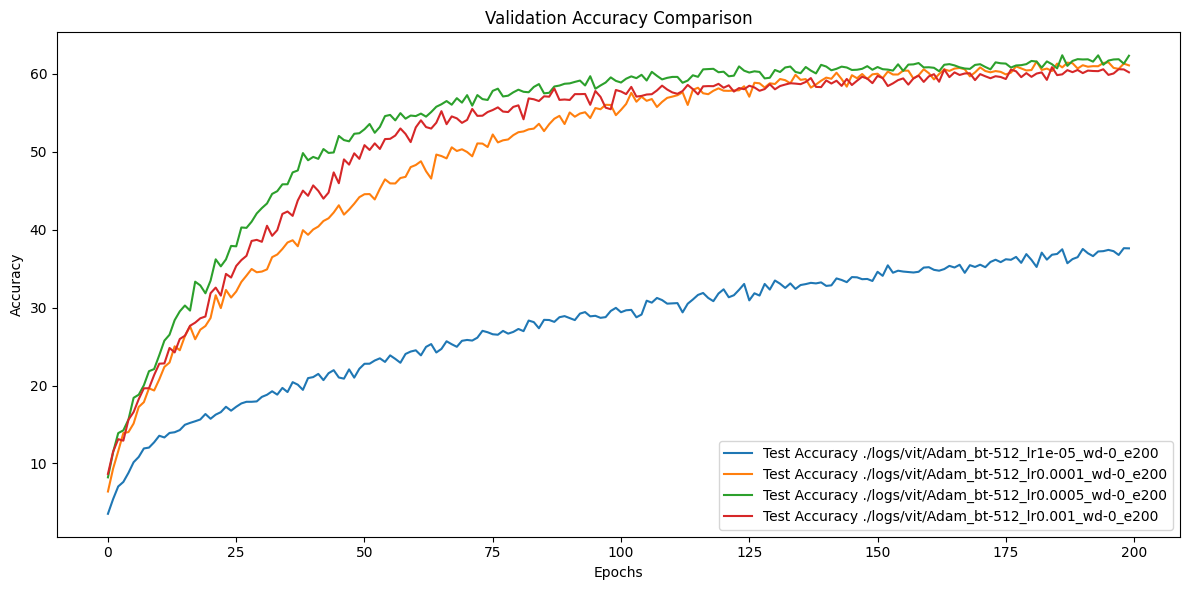

In [4]:


# 路径为TensorBoard日志文件的路径
log_dirs = []
base_lr_list = [0.00001, 0.0001, 0.0005, 0.001]
weight_decay_list = [0]

for lr in base_lr_list:
    for wd in weight_decay_list:
        # log_dir = f'./logs/resnet18/Adam_bt-{512}_lr{lr}_wd-{wd}_e200'
        # log_dirs.append(log_dir)
        log_dir = f'./logs/vit/Adam_bt-{512}_lr{lr}_wd-{wd}_e200'
        log_dirs.append(log_dir)

plot_Acc(log_dirs)

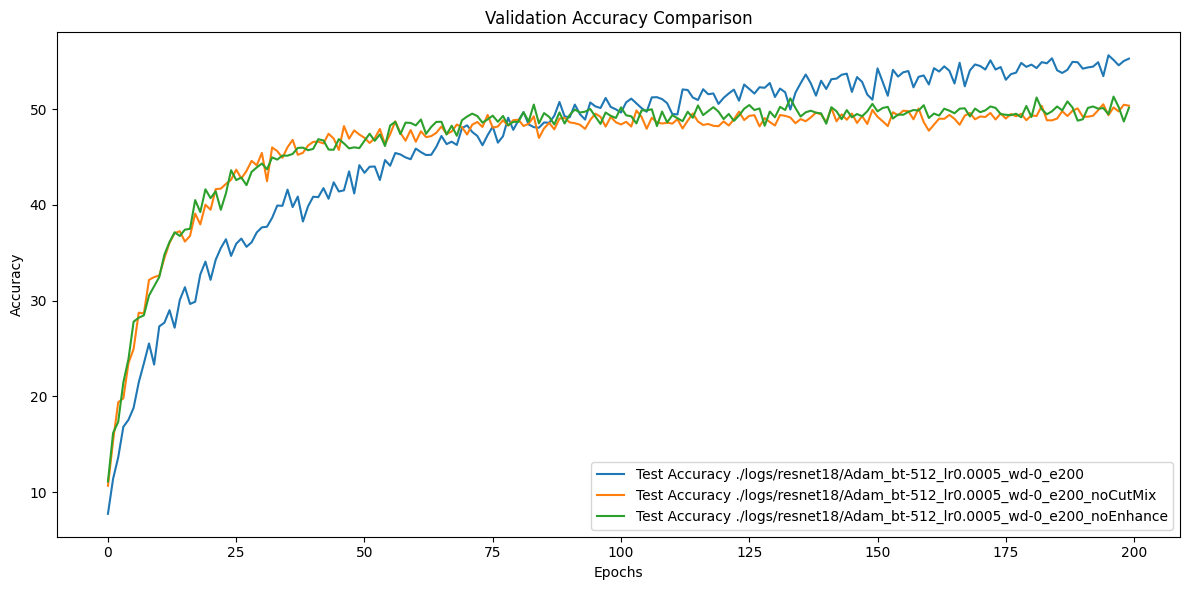

In [29]:
# 路径为TensorBoard日志文件的路径
log_dirs = []
base_lr_list = [0.0005]
weight_decay_list = [0]

for lr in base_lr_list:
    for wd in weight_decay_list:
        log_dir = f'./logs/resnet18/Adam_bt-{512}_lr{lr}_wd-{wd}_e200'
        log_dirs.append(log_dir)
        log_dir = f'./logs/resnet18/Adam_bt-{512}_lr{lr}_wd-{wd}_e200_noCutMix'
        log_dirs.append(log_dir)
        log_dir = f'./logs/resnet18/Adam_bt-{512}_lr{lr}_wd-{wd}_e200_noEnhance'
        log_dirs.append(log_dir)

        # log_dir = f'./logs/vit/Adam_bt-{512}_lr{lr}_wd-{wd}_e200'
        # log_dirs.append(log_dir)
        # log_dir = f'./logs/vit/Adam_bt-{512}_lr{lr}_wd-{wd}_e200_noCutMix'
        # log_dirs.append(log_dir)
        # log_dir = f'./logs/vit/Adam_bt-{512}_lr{lr}_wd-{wd}_e200_noEnhance'
        # log_dirs.append(log_dir)



plot_Acc(log_dirs)

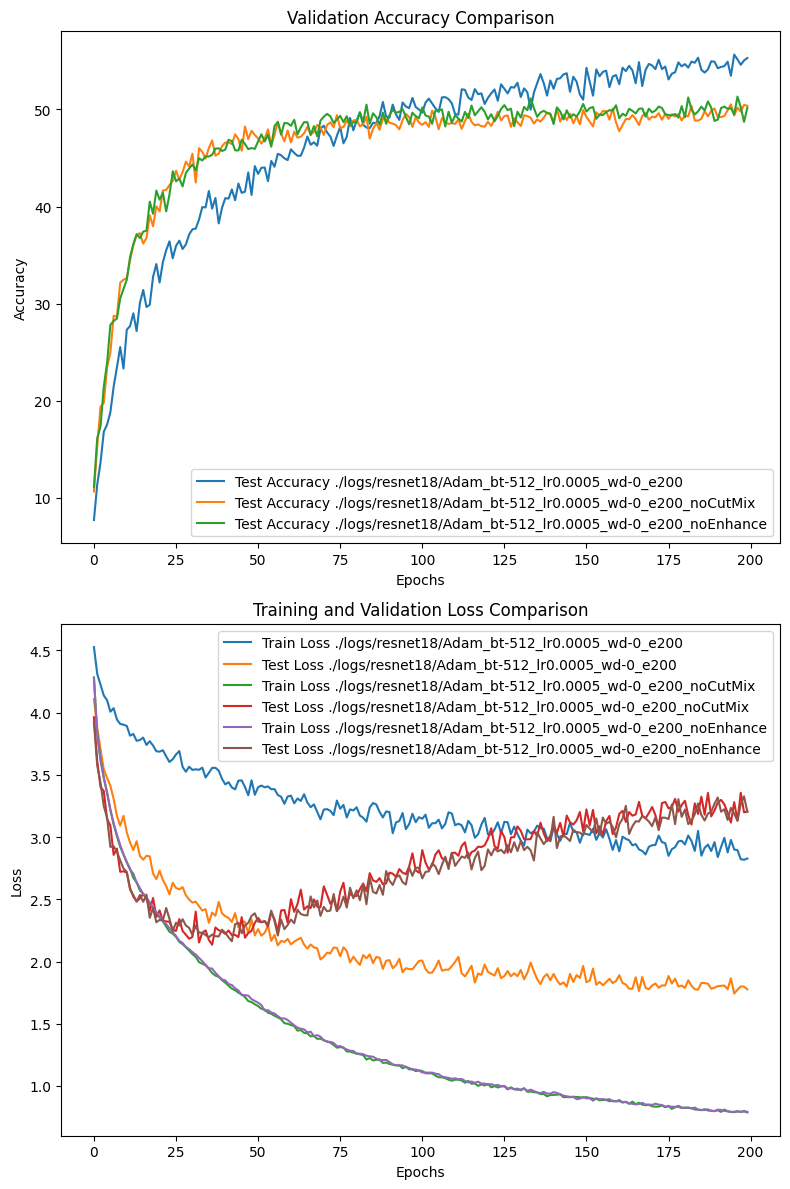

In [10]:
bt = 512
wd = 0
# 路径为TensorBoard日志文件的路径
log_dirs = []

log_dir = f'./logs/resnet18/Adam_bt-{bt}_lr{0.0005}_wd-{wd}_e200'
log_dirs.append(log_dir)
# log_dir = f'./logs/vit/Adam_bt-{bt}_lr{0.0005}_wd-{wd}_e200'
# log_dirs.append(log_dir)

log_dir = f'./logs/resnet18/Adam_bt-{bt}_lr{0.0005}_wd-{wd}_e200_noCutMix'
log_dirs.append(log_dir)
# log_dir = f'./logs/vit/Adam_bt-{bt}_lr{0.0005}_wd-{wd}_e200_noCutMix'
# log_dirs.append(log_dir)

log_dir = f'./logs/resnet18/Adam_bt-{bt}_lr{0.0005}_wd-{wd}_e200_noEnhance'
log_dirs.append(log_dir)
# log_dir = f'./logs/vit/Adam_bt-{bt}_lr{0.0005}_wd-{wd}_e200_noEnhance'
# log_dirs.append(log_dir)


plot_tensorboard_logs(log_dirs)
